## Computational Astrophysics
### Assignment 3 : Numerical Simulations of Kirkwood Gaps in the Asteroid Belt
Sarah Kok (11870044), Maria Georganti (11901039) and Athul Muralidhar (11391553)

In this code the histogram for the asteroid main-belt distribution is made. The time over which the data is made started at a 100 years for a 100 asteroids and was later increased to 10.000 years and 10.000 asteroids. The h value used was 0.01.
Also a phase-space plot is made for the Euler-Forward and Euler-Cromer. The time used is 50 years and for 100 asteroids, the h value used is 0.005.

In [2]:
# Imports
import numpy as np
from numpy.random import random
from numpy.random import randint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from time import time
from matplotlib import animation

### Histogram of the Asteroid Main-Belt Distibution
#### This histogram is made from the data for 100 years with 1000 asteroids.

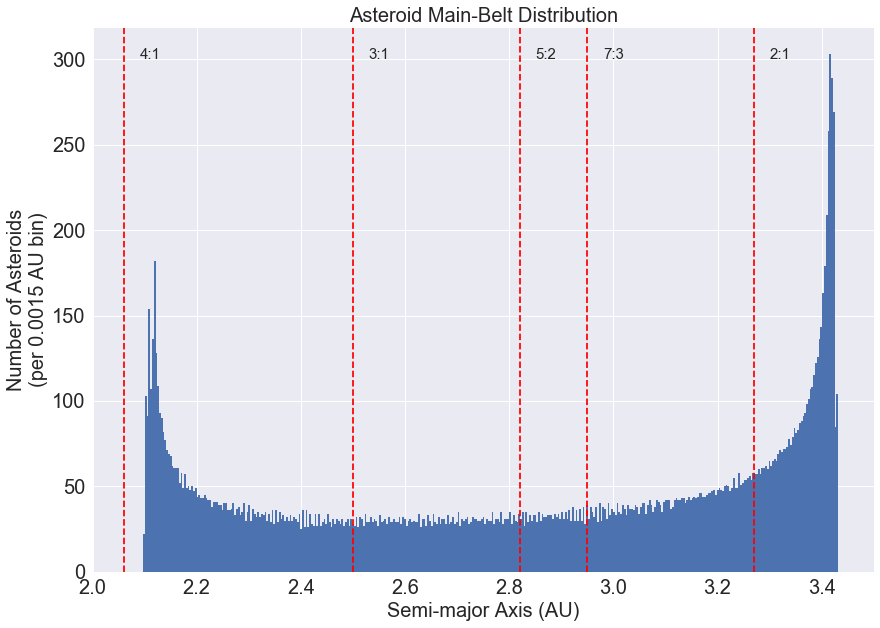

In [3]:
data = np.loadtxt("AsteroidData.txt")
ast_r = data[:,3]

# Set up plot window
fig, ax = plt.subplots(1,1,figsize=(14,10))

# Make histogram
counts, edges, patches = ax.hist(ast_r, bins=1000,normed=False)
ax.set_title("Asteroid Main-Belt Distribution", fontsize=20)
ax.set_xlabel("Semi-major Axis (AU)", fontsize=20)
ax.set_ylabel("Number of Asteroids\n(per 0.0015 AU bin)", fontsize=20)

ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)
ax.set_xlim(2.,3.5)

# Most prominent Kirkwood gaps
plt.axvline(x=2.06,color='red',linestyle='--')
plt.text(2.09, 300,'4:1',size=15)
plt.axvline(x=2.5,color='red',linestyle='--')
plt.text(2.53, 300,'3:1',size=15)
plt.axvline(x=2.82,color='red',linestyle='--')
plt.text(2.85, 300,'5:2',size=15)
plt.axvline(x=2.95,color='red',linestyle='--')
plt.text(2.98, 300,'7:3',size=15)
plt.axvline(x=3.27,color='red',linestyle='--')
plt.text(3.3, 300,'2:1',size=15)

plt.show()

### Phase-Space diagram

In [4]:
s = time()

# Some constants
G = 4*np.pi**2                          # Gravitational constant (units of M_sun, AU and year)
M_sun = 1.                              # Solar mass
h = 0.005

# Jupiter
a = 5.204                           # Semi-major-axis (units of AU)
e = 0.0489                          # Eccentricity
M_j = 1.898*10**27/(1.989*10**30)     # Fraction of the Sun

# The Euler-Forward method
def eul_fwd(h,theta,prev):
    
    r = (prev[0]**2+prev[2]**2)**3/2
    matrix_x = np.array([[1,h],[-4*np.pi**2*h*np.cos(theta)/r,1]])
    matrix_y = np.array([[1,h],[-4*np.pi**2*h*np.sin(theta)/r,1]])
    
    xvprev = np.array([prev[0],prev[1]])
    yuprev = np.array([prev[2],prev[3]])
    
    xv = np.dot(matrix_x,xvprev)
    yu = np.dot(matrix_y,yuprev)
  
    return np.array([xv,yu])


# The Euler-Cromer method
def eul_crom(time,h):
    
    n = int(time/h)  
    r = np.zeros((3,n))
    v = np.zeros((3,n))
    radius = np.zeros(n)
    accel_sun = np.zeros(n)
    
    r[0][0] = 0.0
    r[1][0] = a*(1-e)
    r[2][0] = 0.0
    v[0][0] = -np.sqrt((G*M_sun/a) * (1+e)/(1-e))
    v[1][0] = 0.0
    v[2][0] = 0.0
    
    for t in range(n-1):
        radius[t] = np.sqrt(r[0][t]**2 + r[1][t]**2)
        accel_sun[t]= -G*M_sun/(radius[t]**3)
        
        for dim in range(2):
            v[dim][t+1] =  v[dim][t] + h*accel_sun[t]*r[dim][t]
            r[dim][t+1] =  r[dim][t] + h*v[dim][t+1] 
     
    return r,v

years = 50
timestep = 1/365.
r_j, v_j = eul_crom(years, timestep)

theta = np.linspace(0.1,2*np.pi)
j=1
res_x = []
res_v = []
res_y = []
res_u = []

for i in theta:
    if j==1:
        prev = [1,0,5.204*(1-0.0489),-((4*np.pi**2*(1+0.0489))/(5.204*(1-0.0489)))**1/2] #x,v,y,u
    else:
        prev[0] = a[0][0]
        prev[1] = a[0][1]
        prev[2] = a[1][0]
        prev[3] = a[1][1]
    
    a = eul_fwd(h,i,prev)
    res_x.append(a[0][0])
    res_v.append(a[0][1])
    res_y.append(a[1][0])
    res_u.append(a[1][1])
    j=j+1

e = time()
print('time taken:',e-s)

('time taken:', 0.18074989318847656)


#### Euler-Forward method

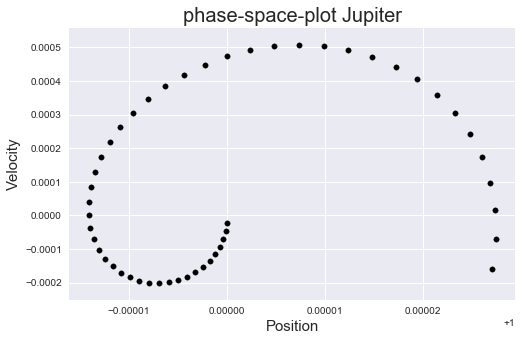

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(8,5))

ax1.scatter(res_x, res_v, c='black', s=30)

ax1.set_xlim(min(res_x)-0.000002,max(res_x)+0.000002)
ax1.set_ylim(min(res_v)-0.00005,max(res_v)+0.00005)

ax1.set_xlabel("Position", fontsize=15)
ax1.set_ylabel("Velocity", fontsize=15)
ax1.set_title("phase-space-plot Jupiter", fontsize=20)

plt.show()

#### Euler-Cromer method

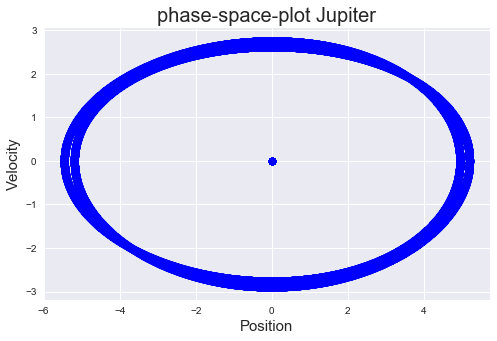

In [8]:
fig, ax2 = plt.subplots(1,1,figsize=(8,5))
ax2.scatter(r_j,v_j,c='b')

ax2.set_xlabel("Position", fontsize=15)
ax2.set_ylabel("Velocity", fontsize=15)
ax2.set_title("phase-space-plot Jupiter", fontsize=20)

plt.show()